In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

In [9]:
# Load the air quality data
air_quality_data = pd.read_csv((r'C:\Users\tvams\OneDrive\Desktop\Imputation methods\Step-3.csv'))


In [10]:
# Perform min-max normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(air_quality_data.drop(columns=['Date', 'AQI']))
X_normalized = normalized_data
y = air_quality_data['AQI']


In [11]:
# Reshape data for LSTM/GRU/RNN input
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])



In [12]:
# Define LSTM model
start_time = time.time()
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile LSTM model
lstm_model.compile(optimizer='adam', loss='mse')
end_time = time.time()
compilation_time_lstm = end_time - start_time

# Train LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict using LSTM model
lstm_y_pred = lstm_model.predict(X_test)

# Calculate evaluation metrics for LSTM model
lstm_mae = mean_absolute_error(y_test, lstm_y_pred)
lstm_mse = mean_squared_error(y_test, lstm_y_pred)
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(y_test, lstm_y_pred)

print("LSTM Model Evaluation:")
print(f"Compilation Time: {compilation_time_lstm:.2f} seconds")
print(f"MAE: {lstm_mae:.4f}")
print(f"MSE: {lstm_mse:.4f}")
print(f"RMSE: {lstm_rmse:.4f}")
print(f"R2 Score: {lstm_r2:.4f}")


C:\Users\tvams\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 68720.0938 - val_loss: 64359.0664
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65993.5156 - val_loss: 59736.6719
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59884.8203 - val_loss: 52197.7773
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53369.2344 - val_loss: 43491.3945
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42427.3320 - val_loss: 34834.9180
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35241.5234 - val_loss: 27351.8203
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25832.2109 - val_loss: 21604.9258
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20923.2402 - val_loss: 17600.6934
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17880.3223 - val_loss: 15055.3408
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15189.7139 - val_loss: 13384.0908
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13500.435

In [13]:
# Define GRU model
start_time = time.time()
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile GRU model
gru_model.compile(optimizer='adam', loss='mse')
end_time = time.time()
compilation_time_gru = end_time - start_time

# Train GRU model
gru_history = gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict using GRU model
gru_y_pred = gru_model.predict(X_test)

# Calculate evaluation metrics for GRU model
gru_mae = mean_absolute_error(y_test, gru_y_pred)
gru_mse = mean_squared_error(y_test, gru_y_pred)
gru_rmse = np.sqrt(gru_mse)
gru_r2 = r2_score(y_test, gru_y_pred)

print("\nGRU Model Evaluation:")
print(f"Compilation Time: {compilation_time_gru:.2f} seconds")
print(f"MAE: {gru_mae:.4f}")
print(f"MSE: {gru_mse:.4f}")
print(f"RMSE: {gru_rmse:.4f}")
print(f"R2 Score: {gru_r2:.4f}")


Epoch 1/100


C:\Users\tvams\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 69852.6719 - val_loss: 63465.2344
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62989.8047 - val_loss: 57455.3242
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57702.3555 - val_loss: 48743.6680
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48006.0781 - val_loss: 39343.4219
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37676.5078 - val_loss: 30656.6328
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30398.4023 - val_loss: 23637.2285
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24664.6602 - val_loss: 18772.5898
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19053.7871 - val_loss: 15749.1758
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15240.9434 - val_loss: 14037.1807
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14849.1162 - val_loss: 13007.7188
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13376.7275 - val_loss

In [14]:
# Define RNN model
start_time = time.time()
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile RNN model
rnn_model.compile(optimizer='adam', loss='mse')
end_time = time.time()
compilation_time_rnn = end_time - start_time

# Train RNN model
rnn_history = rnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict using RNN model
rnn_y_pred = rnn_model.predict(X_test)

# Calculate evaluation metrics for RNN model
rnn_mae = mean_absolute_error(y_test, rnn_y_pred)
rnn_mse = mean_squared_error(y_test, rnn_y_pred)
rnn_rmse = np.sqrt(rnn_mse)
rnn_r2 = r2_score(y_test, rnn_y_pred)

print("\nRNN Model Evaluation:")
print(f"Compilation Time: {compilation_time_rnn:.2f} seconds")
print(f"MAE: {rnn_mae:.4f}")
print(f"MSE: {rnn_mse:.4f}")
print(f"RMSE: {rnn_rmse:.4f}")
print(f"R2 Score: {rnn_r2:.4f}")

Epoch 1/100


C:\Users\tvams\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 66013.3281 - val_loss: 62479.4883
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 63872.2266 - val_loss: 56661.9180
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56162.6211 - val_loss: 48730.0664
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46139.0195 - val_loss: 39782.0547
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38708.4844 - val_loss: 31033.3594
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31656.8457 - val_loss: 23728.2910
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24060.3066 - val_loss: 18483.8750
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18514.4961 - val_loss: 15269.2373
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15017.5508 - val_loss: 13481.9785
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13869.8594 - val_loss: 12376.6201
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12777.1992 - val_loss

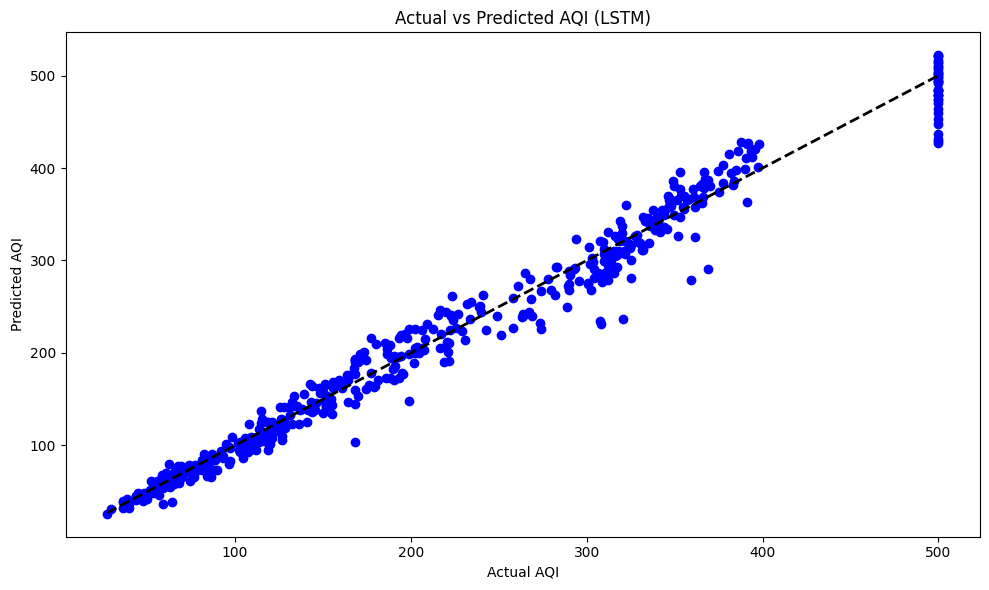

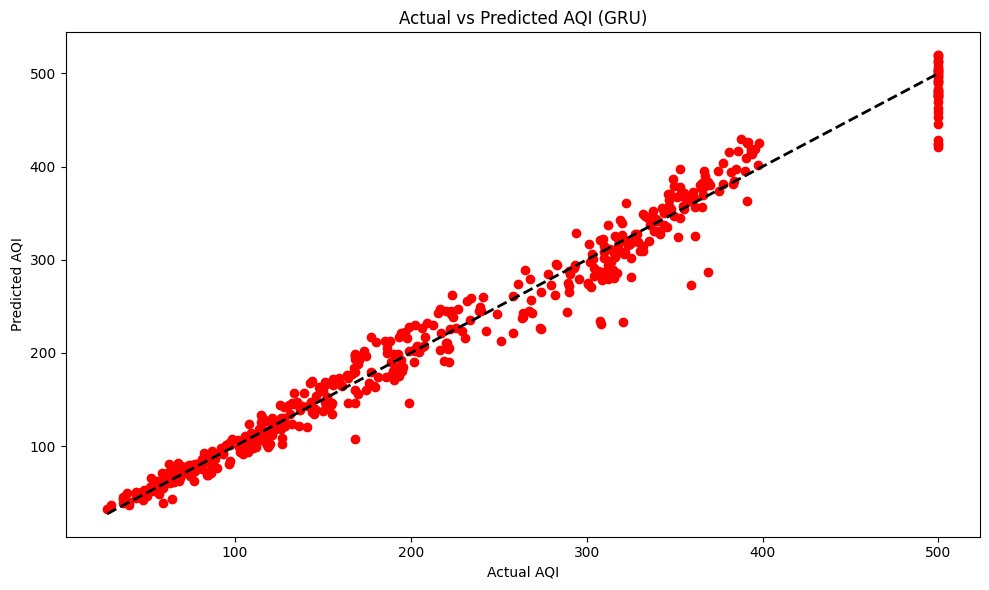

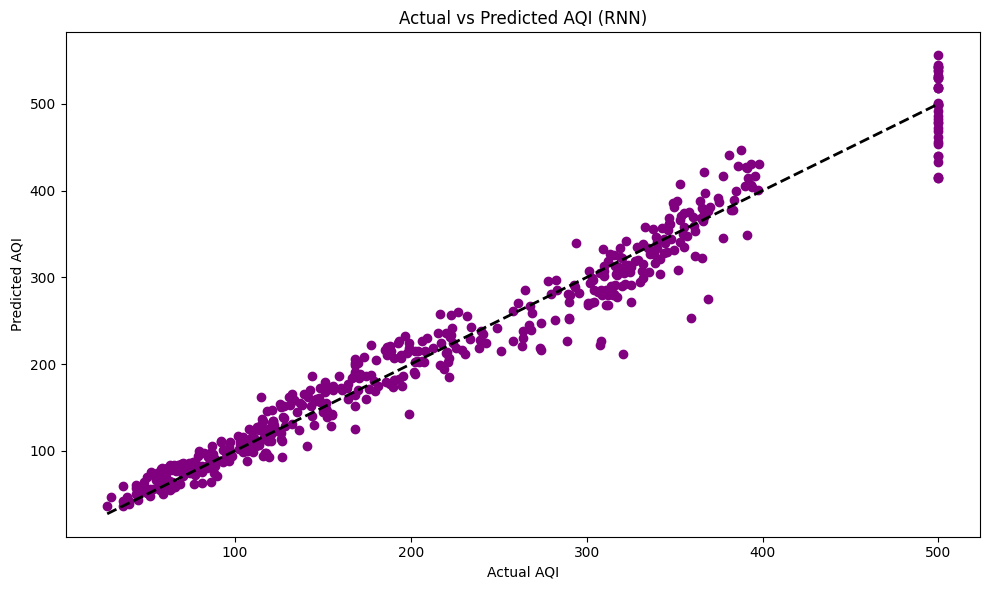

In [16]:
# Plot actual vs predicted AQI values for LSTM model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lstm_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI (LSTM)')
plt.tight_layout()
plt.show()
# Plot actual vs predicted AQI values for GRU model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gru_y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI (GRU)')
plt.tight_layout()
plt.show()

# Plot actual vs predicted AQI values for RNN model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rnn_y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI (RNN)')
plt.tight_layout()
plt.show()


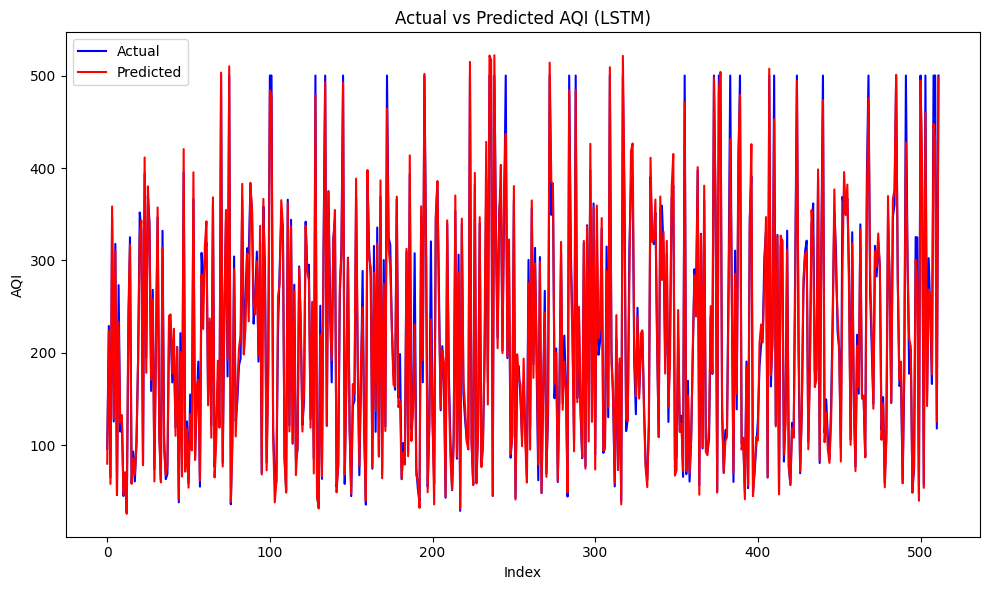

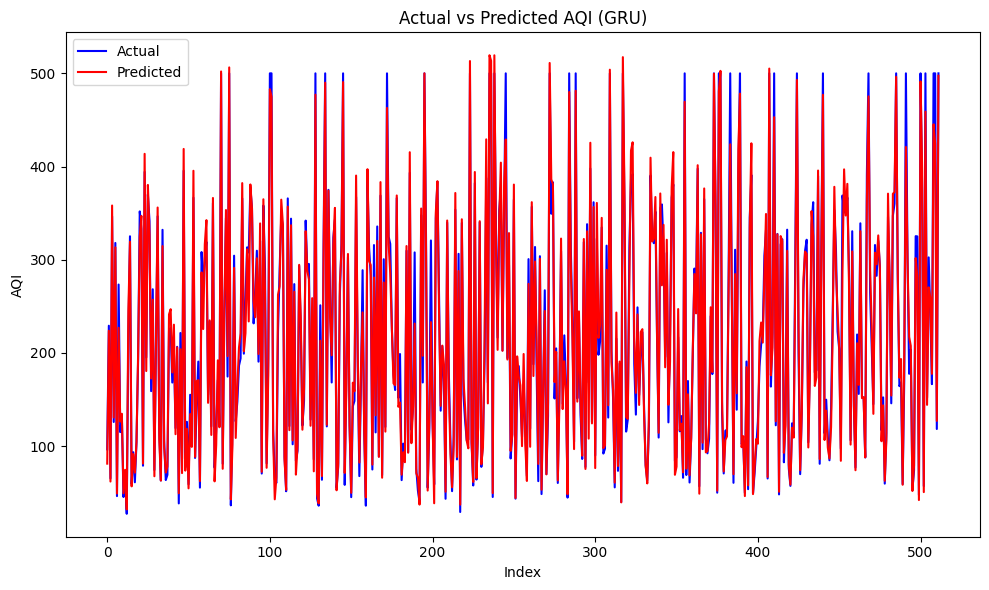

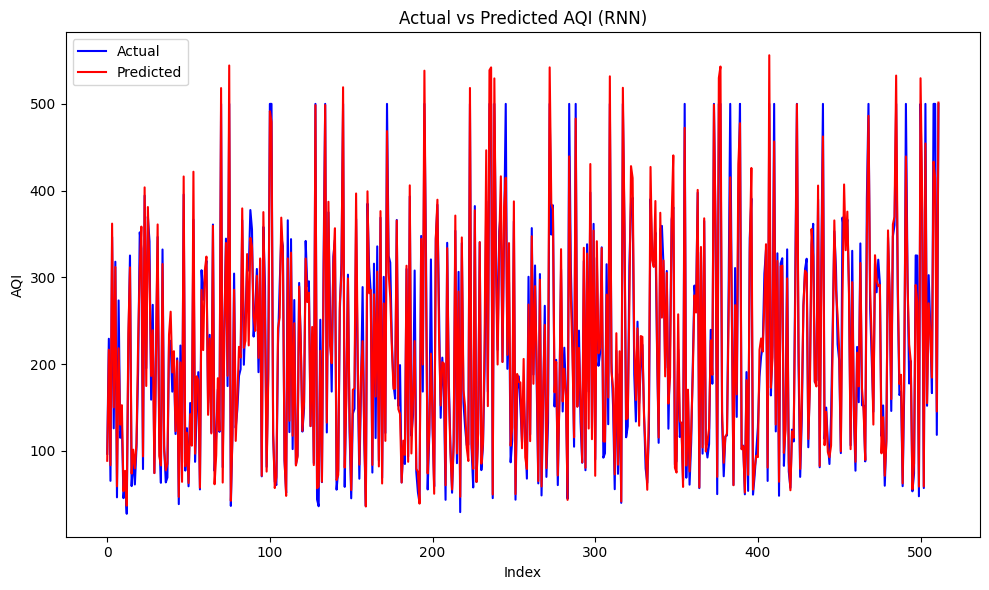

In [17]:
# Plot actual vs predicted AQI values for LSTM model
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(lstm_y_pred, label='Predicted', color='red')
plt.xlabel('Index')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI (LSTM)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot actual vs predicted AQI values for GRU model
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(gru_y_pred, label='Predicted', color='red')
plt.xlabel('Index')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI (GRU)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot actual vs predicted AQI values for GRU model
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(rnn_y_pred, label='Predicted', color='red')
plt.xlabel('Index')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI (RNN)')
plt.legend()
plt.tight_layout()
plt.show()